# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка
#### **Профиль биология**

Загрузите [данные](https://www.kaggle.com/datasets/marshuu/breast-cancer) по предсказанию рака груди.

   

In [20]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [21]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Полей с пропусками нет

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

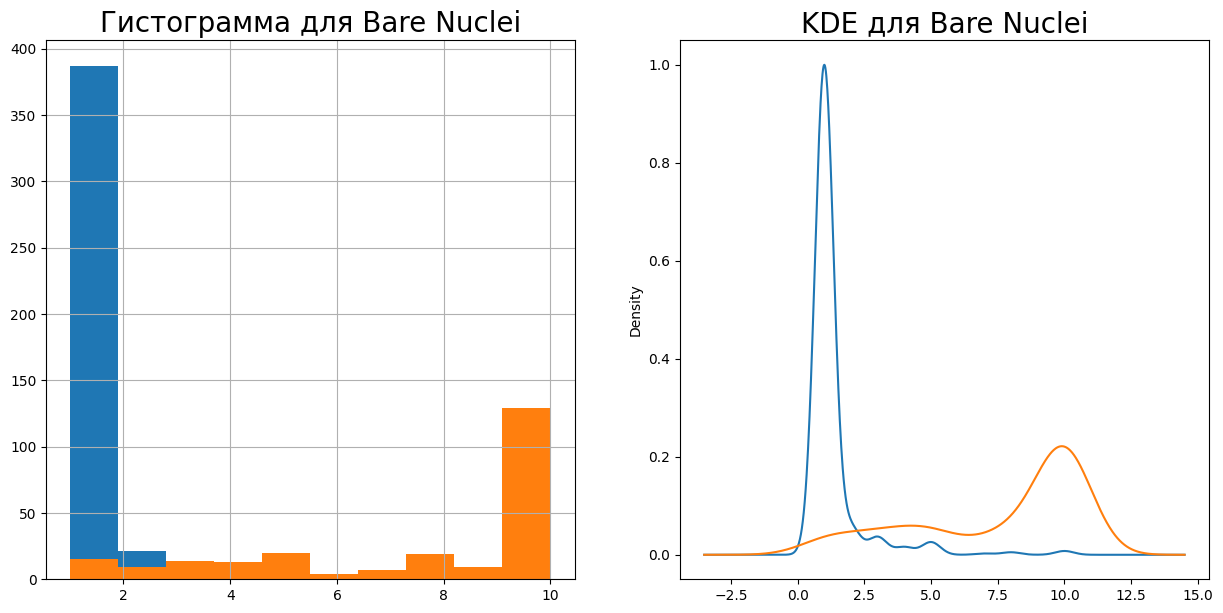

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], )
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

In [23]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [24]:
data.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

<AxesSubplot: xlabel='Bare Nuclei', ylabel='Count'>

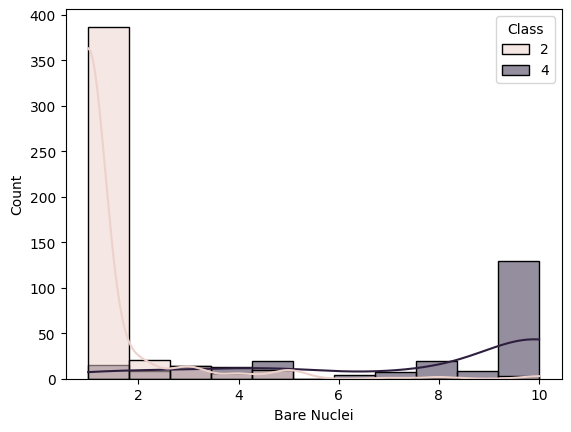

In [25]:
import seaborn as sns
sns.histplot(data,x='Bare Nuclei', kde = True, hue = 'Class')

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса.


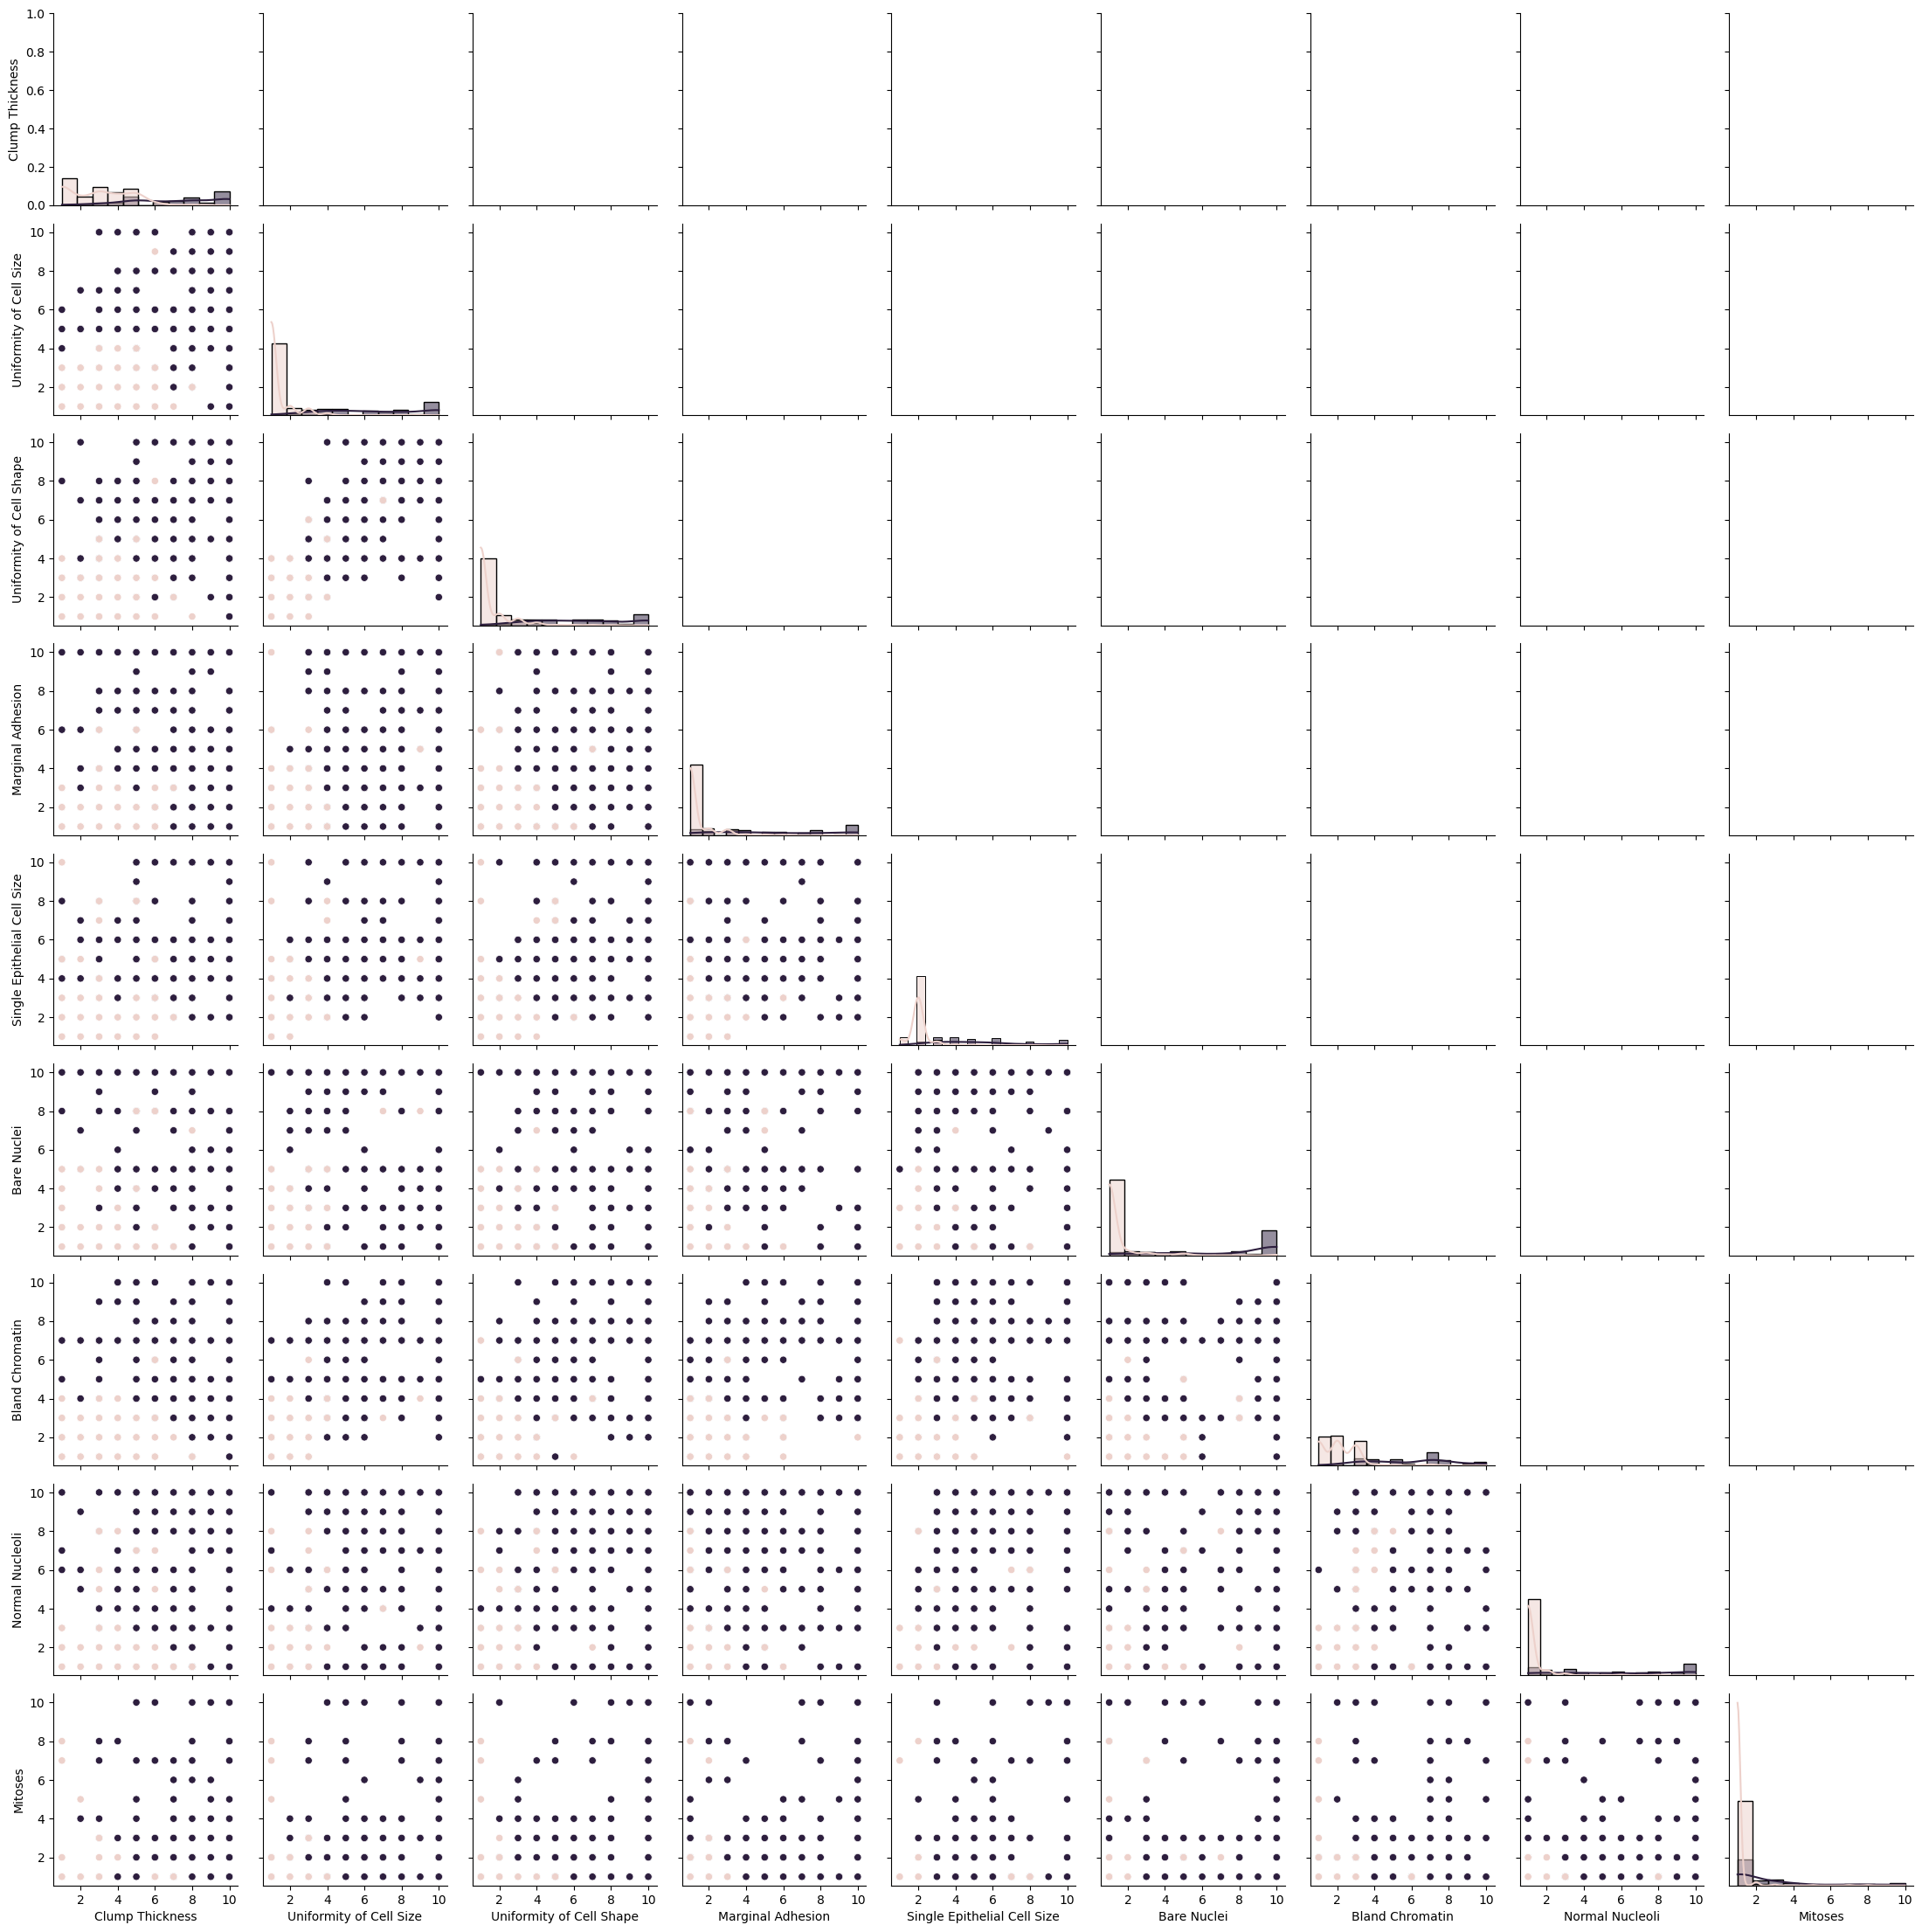

In [26]:
import seaborn as sns
from functools import partial

p_1 = partial(sns.histplot, kde= True)
p_2 = partial(sns.scatterplot)


g = sns.PairGrid(data, hue='Class')
g.map_diag(p_1)
g.map_lower(p_2)

Какие выводы вы можете сделать из полученный графиков? 

**Вывод:** 
Классы визуально различимы. Распределения неравномерны, дискретны. Ожидаем сильную модель

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров. 

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [27]:
import pandas as pd
data = pd.read_csv('dataset.csv')
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать. 

In [28]:
from sklearn.preprocessing import LabelEncoder
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id', 
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [29]:
print(data.isna().sum())
data.dropna(inplace=True)

pha                    0
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
dtype: int64


Null полей нет

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

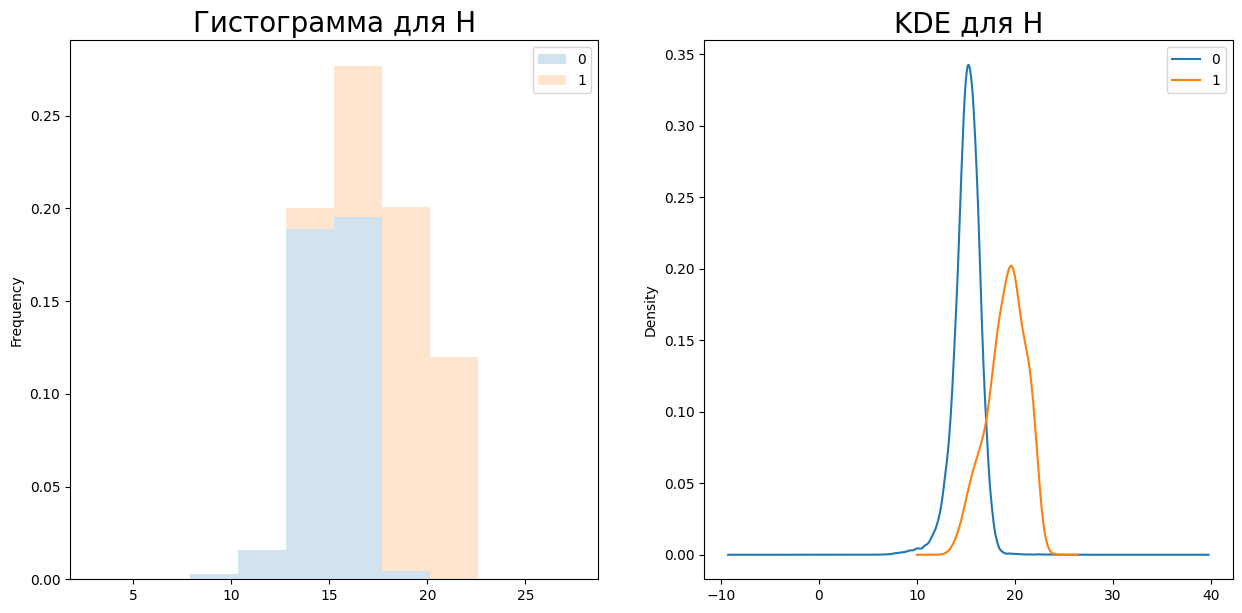

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.pivot(columns='pha').H.plot(kind='hist',ax=axs[0], alpha=0.2,stacked=True,density=True)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20)
axs[0].legend()
axs[1].legend()

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** При работе с гистограмме используем alpha-слой для избежания перекрытия графиков. В случае бинарной классификации получаем одинаково удобную для восприятия информацию. Преимущество гистограмм - нулевая плотность при значениях, не встречающихся в датасете. Отрицательные значения для возраста могут смущать эксперта, читающего статью. Для случая мультикласса, kde -графики удобнее. Линии проще различать при перекрытии графиков

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

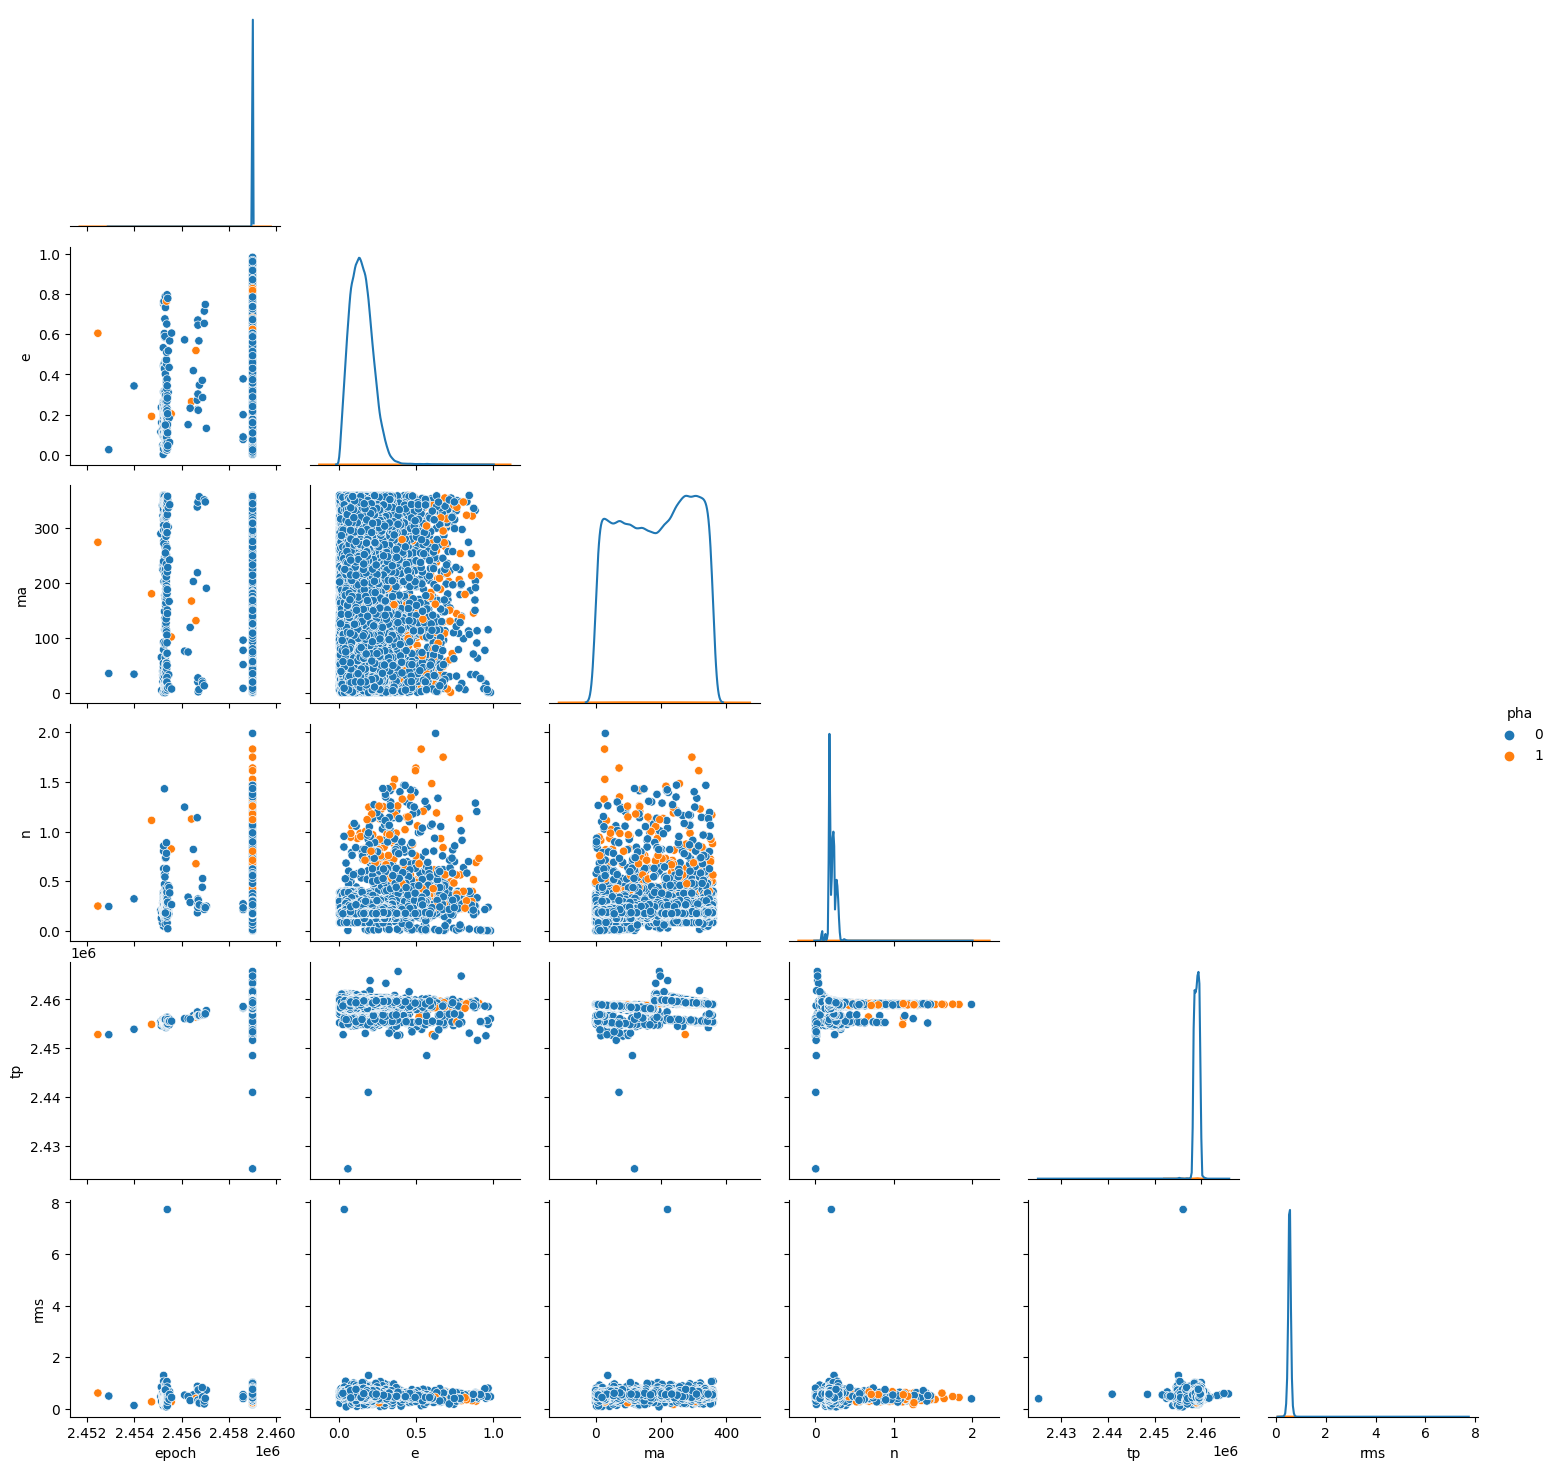

In [62]:
features = ['epoch', 'e', 'ma', 'n', 'tp', 'rms']

import seaborn as sns


g = sns.PairGrid(data, vars = features, corner=True, hue='pha',diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend()

Какие выводы вы можете сделать из полученный графиков?

**Вывод:** распределения классов визуально различимы. Ожидаем сильную модель

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [191]:
X = data[features]
y = data['pha']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Отмасштабируйте свои признаки.

In [192]:
from sklearn.preprocessing import StandardScaler

pipe = [('scaler', StandardScaler())]


Обучите модель логистической регрессии.

In [193]:
from sklearn.pipeline import Pipeline
pipe.append(('logistic_regression',LogisticRegression()))

pipe = Pipeline(pipe)

pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [194]:
from sklearn.metrics import roc_auc_score
results = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_test,results)

0.9985560865996936

In [195]:
y_test.value_counts()

0    39285
1       58
Name: pha, dtype: int64

In [197]:
accuracy_score(y_test, results > 0.5)

0.9984749510713469

**Вывод:** получили модель *превосходного качества*. 



### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

### Без регуляризации

#### Градиентный спуск

Имеем $n$ сэмплов в выборки и learning rate $\eta$.

$\frac{\partial l_Y}{\partial \theta} = \sum_{i=1}^n x_i \cdot (y_i - \sigma(\theta^Tx_i))$


$ \theta_{k+1} = \theta_k + \eta \frac{1}{n} \sum_{i=1}^n x_i \cdot (y_i - \sigma(\theta^Tx_i))$

#### Стохастический градиентный спуск:

Опеределим batch - партию

Сэмплируем m индексов из дискретного равномерного распределения $U(1,...,n)$ - $i_1, ..., i_m$.

Батч - набор элементов из выборки по индексам $i_1, ..., i_m$.

$ \theta_{k+1} = \theta_k + \eta \frac{1}{m} \sum_{j=1}^m x_{i_j} \cdot (y_{i_j} - \sigma(\theta^Tx_{i_j}))$

### Регуляризации:

#### Градиентный спуск

$ \theta_{k+1} = \theta_k + \eta \frac{1}{n} \sum_{i=1}^n x_i \cdot (y_i - \sigma(\theta^Tx_i)) - 2 \eta \lambda \theta$

#### Стохастический градиентный спуск:

$ \theta_{k+1} = \theta_k + \eta \frac{1}{m} \sum_{j=1}^m x_{i_j} \cdot (y_{i_j} - \sigma(\theta^Tx_{i_j})) - 2 \eta \lambda \theta$

**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

При l2-регуляризации коэффициенты учитываются в оптимизируемой функции с равным весом. Ожидаем равный масштаб признаков. Иначе при линейных преобразованиях признака будем получать различные предсказания, при качественно совпадающих распределениях.


Пример:
Записали рост в см в метрах, ожидаем уменьшение коэффициента в 100 раз. Эта логика не выполняется, поскольку в оптимизируемой функции присутствует член, отвечающий за абсолютную величину коэффициента.

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [109]:
theta = np.zeros(len(features)+1).reshape(1,-1)

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

In [200]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler().fit(X_train)

X_train_std,X_test_std = std_scaler.transform(X_train), std_scaler.transform(X_test)
y_train_np, y_test_np = y_train.to_numpy(), y_test.to_numpy()


In [201]:
X_train_std = np.c_[ X_train_std , np.ones(len(X_train_std )) ]

X_test_std = np.c_[ X_test_std, np.ones(len(X_test_std)) ]


In [203]:
b = 256
eta = 1e-1
lamb = 1e-1
iter = 1000

def sigma(theta,x):
    return 1/(1+np.exp(-theta@x.T))

train_aucs, test_aucs = [], []
train_acc, test_acc = [], []

theta = np.zeros(len(features)+1).reshape(1,-1)

for i in range(iter):
    perm = np.random.choice(range(len(X_train_std)),size=b,replace=True)
    theta += 1/b * eta *  (y_train_np[perm] - sigma(theta,X_train_std[perm])) @ X_train_std[perm] - 2 * eta * theta * lamb

    pred_train = sigma(theta,X_train_std)
    pred_test = sigma(theta,X_test_std)

    train_aucs.append(roc_auc_score(y_train_np, pred_train.T))
    test_aucs.append(roc_auc_score(y_test_np, pred_test.T))

    train_acc.append(accuracy_score(y_train_np, pred_train.T >= 0.5))
    test_acc.append(accuracy_score(y_test_np, pred_test.T >= 0.5))

Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Text(0.5, 1.0, 'ROC AUC')

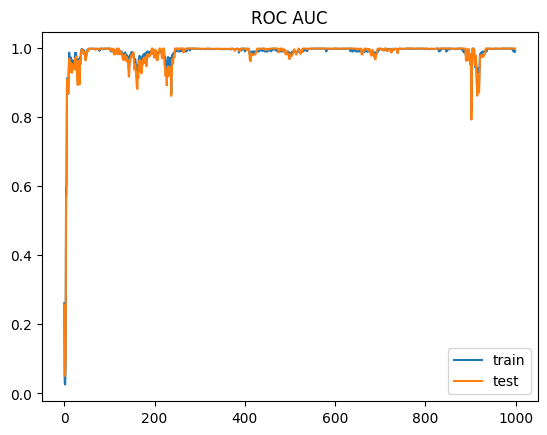

In [205]:
plt.plot(range(1000),train_aucs,label='train')
plt.plot(range(1000),test_aucs,label='test')
plt.legend()
plt.title('ROC AUC')

Text(0.5, 1.0, 'accuracy')

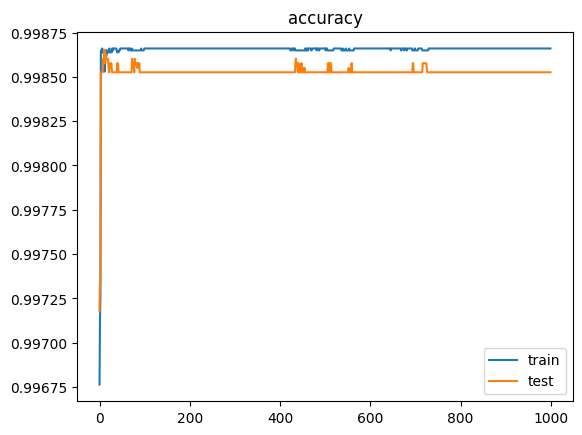

In [207]:
plt.plot(range(1000),train_acc,label='train')
plt.plot(range(1000),test_acc,label='test')
plt.legend()
plt.title('accuracy')

100 итераций для минибатча размера 256 достаточно

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.
- Размер минибатча позволяют соблюсти баланс между дисперсией градиента и скоростью обучению.
- Наблюдаем выбросы на графике обучения. Связываю с дисбалансом классов. В минибатч не попал сэмпл положительного класса.
- имеем выпуклую функцию оптимизации. Градиентный подъем гарантировано сходится, но можем лучше, используя гладкость.
- В общем случае SGD без моментов - грустно :( Останавливаемся в локальных минимумах. Лучше пробовать разные методы оптимизации из коробки :) Например, ADAM  